In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score
from tensorflow.keras.regularizers import l2

In [2]:
train = pd.read_csv("data_preCO.csv")
train.head()

,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,NOx(GT),CO(GT)
0,0.706602,0.251980,0.803369,0.515949,0.435782,0.579952,0.635966,0.538977,0.873262,0.866632,0.992715,0.217987,2.6
1,0.675914,0.224622,0.793949,0.478355,0.476541,0.541041,0.591176,0.430539,0.872036,0.862540,0.992555,0.180465,2.0
2,0.725626,0.207343,0.792434,0.471935,0.464834,0.581805,0.589748,0.467909,0.866312,0.884391,0.992678,0.197141,2.2
3,0.713622,0.201584,0.793310,0.475663,0.448183,0.596628,0.599580,0.515380,0.862633,0.905371,0.992858,0.221560,2.2
4,0.666855,0.180706,0.783033,0.428956,0.487382,0.585510,0.568067,0.481131,0.863246,0.903891,0.992868,0.197141,1.6


In [3]:
threshold = train["CO(GT)"].mean()
train["target"] = np.where(train["CO(GT)"] > threshold, 1, 0)
target = train["target"]
train.drop(["CO(GT)", "target"], axis=1, inplace=True)

###### 先使用简单交叉验证， 之后会用K折交叉验证重新测试

In [4]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=42, shuffle=True)

In [5]:
unique_labels = np.unique(y_train)
print("Unique labels in y_train:", unique_labels)

Unique labels in y_train: [0 1]


In [6]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1], )))
# model.add(Dropout(0.2))
model.add(Dense(8, activation="relu"))
# model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50


C:\Users\learn\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6732 - loss: 0.5731 - val_accuracy: 0.8002 - val_loss: 0.4184
Epoch 2/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8149 - loss: 0.3684 - val_accuracy: 0.8959 - val_loss: 0.3096
Epoch 3/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9091 - loss: 0.2746 - val_accuracy: 0.8941 - val_loss: 0.2907
Epoch 4/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9058 - loss: 0.2672 - val_accuracy: 0.8965 - val_loss: 0.2989
Epoch 5/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9031 - loss: 0.2715 - val_accuracy: 0.8947 - val_loss: 0.2910
Epoch 6/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9147 - loss: 0.2440 - val_accuracy: 0.8965 - val_loss: 0.2900
Epoch 7/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9045 - loss: 0.2705 - val_accuracy: 0.8965 - val_loss: 0.2851
Epoch 8/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9109 - loss: 0.2486 - val_accuracy: 0.8965 - val_

In [7]:
import matplotlib.pyplot as plt

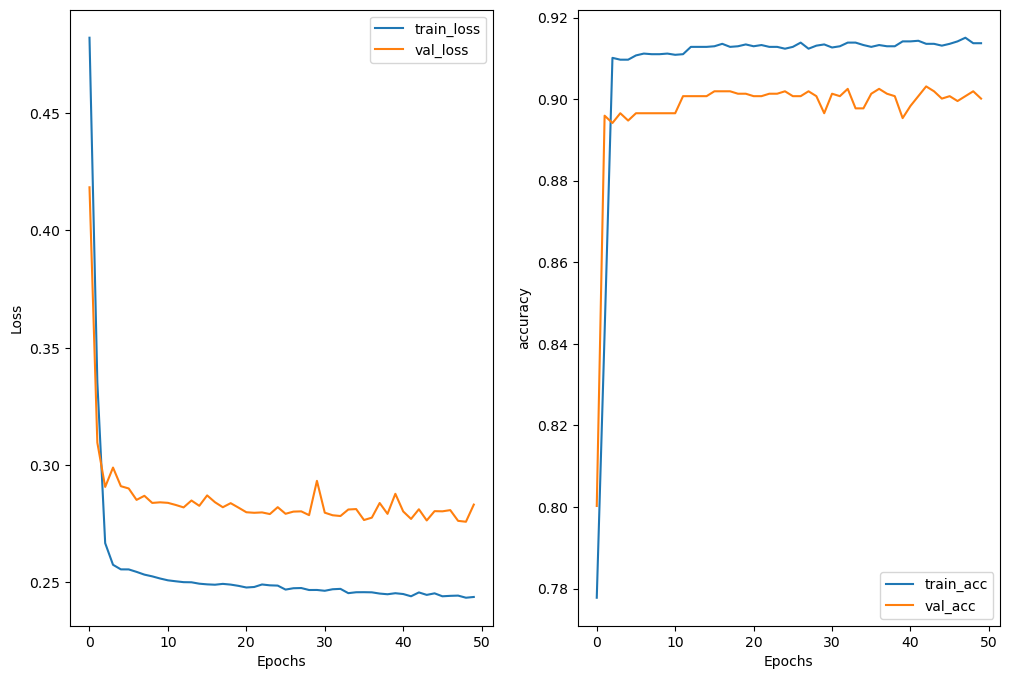

In [8]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

###### 我们可以看到，在我们的疯狂炼丹下， 准确率只达到了90%, 坏消息是无论是增加层数还是隐藏节点都不会提高准确率，但是目前并没有发生过拟合.
###### 说明此时训练模型遇到瓶颈，需要对数据进行新的变化，记下来我们将对数据进行多项式变换

In [9]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

In [10]:
X = pd.read_csv("data_preCO.csv")
threshold = X["CO(GT)"].mean()
X["target"] = np.where(X["CO(GT)"] > threshold, 1, 0)
y = X["target"]
X.drop(["target", "CO(GT)"], axis=1, inplace=True)

In [11]:
poly_X = poly.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size=0.2, random_state=42, shuffle=True)

In [38]:
model = Sequential()
# , kernel_regularizer=l2(0.01))
model.add(Dense(128, activation='relu', input_shape=(poly_X.shape[1], )))
# model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
# model.add(Dropout(0.5))
model.add(Dense(32, activation="relu"))
# model.add(Dropout(0.5))
model.add(Dense(32, activation="relu"))
# model.add(Dropout(0.5))
# model.add(Dense(8, activation="relu"))
# model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(poly_X, target, epochs=250, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/250


C:\Users\learn\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8438 - loss: 0.3701 - val_accuracy: 0.8965 - val_loss: 0.2861
Epoch 2/250
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9143 - loss: 0.2553 - val_accuracy: 0.9025 - val_loss: 0.2931
Epoch 3/250
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9091 - loss: 0.2629 - val_accuracy: 0.9007 - val_loss: 0.2804
Epoch 4/250
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9186 - loss: 0.2458 - val_accuracy: 0.9013 - val_loss: 0.2780
Epoch 5/250
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9153 - loss: 0.2505 - val_accuracy: 0.9001 - val_loss: 0.2810
Epoch 6/250
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9138 - loss: 0.2526 - val_accuracy: 0.8852 - val_loss: 0.3106
Epoch 7/250
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9080 - loss: 0.2622 - val_accuracy: 0.8965 - val_loss: 0.2793
Epoch 8/250
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9089 - loss: 0.2642 - val_accuracy: 0.9031

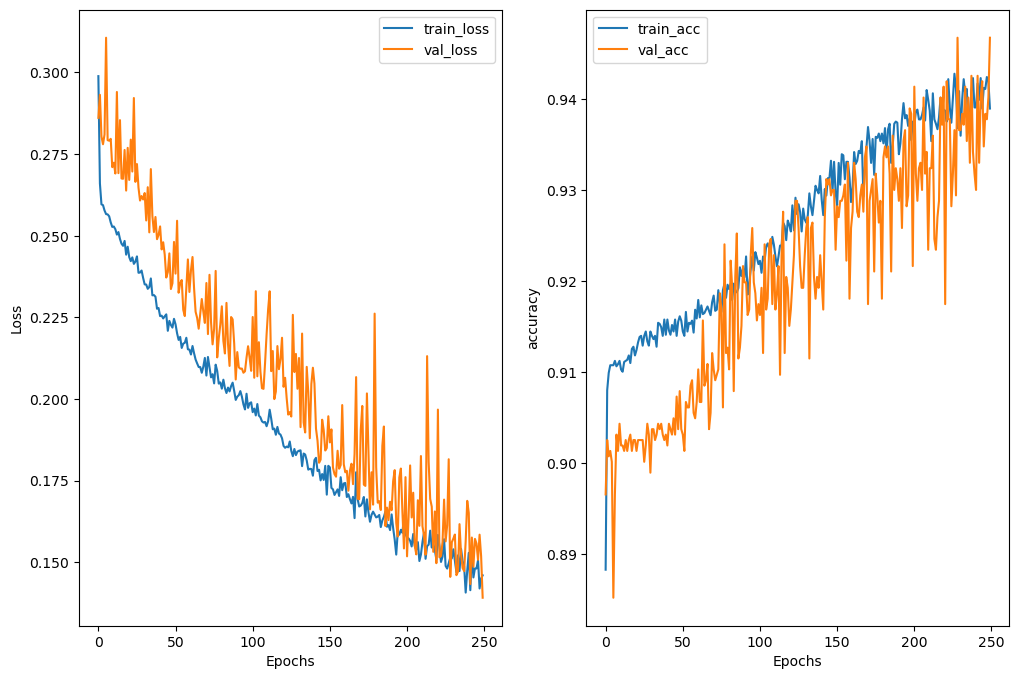

In [39]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [40]:
predict = (model.predict(X_test) > 0.5).astype('int')
accuracy_score(y_test.values, predict)

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


0.9467703349282297

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

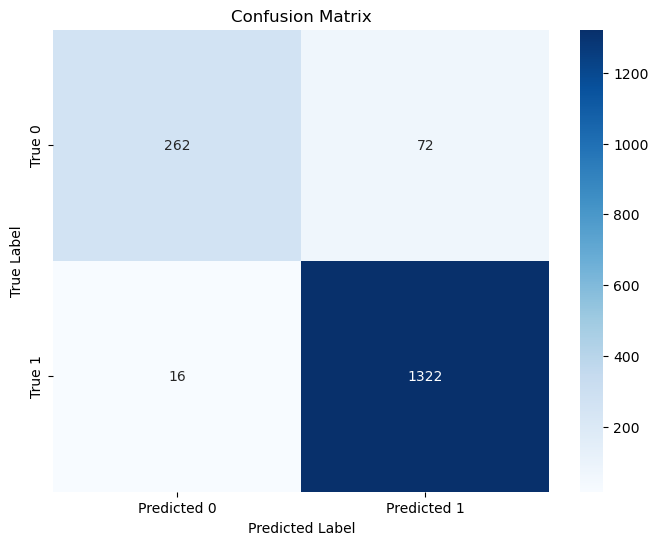

In [22]:
cm = confusion_matrix(y_test, predict)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

##### 从混淆矩阵可以看出，数据不平衡下确实对模型的预测结果产生了一定影响，接下来我们将会对样本进行过采样

###### 过采样

###### 这里注意 Imblearn版本和1.5.0的sklearn不兼容，需要降级。但是在回归任务中，scikeras中的版本与低版本sklearn不兼容

In [1]:
from imblearn.over_sampling import SMOTE


ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\learn\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\_param_validation.py)

In [ ]:
smote = SMOTE()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, shuffle=True)
X_train, y_train = smote.fit_resample(X_train, y_train)